In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df['AQI_Bucket']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
29526            Good
29527    Satisfactory
29528    Satisfactory
29529    Satisfactory
29530            Good
Name: AQI_Bucket, Length: 29531, dtype: object

In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df.dropna(subset = ['AQI'], inplace = True)

In [9]:
df['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [11]:
col = list(df['AQI_Bucket'].value_counts().index)
col

['Moderate', 'Satisfactory', 'Poor', 'Very Poor', 'Good', 'Severe']

In [12]:
ls = []
for i in col:
    i = df[df['AQI_Bucket'] == i]
    i = i.sample(n = 1300)
    i = pd.DataFrame(i)
    ls.append(i)

In [13]:
df = pd.concat(ls)
instance = df['AQI_Bucket'].value_counts()
print(instance)
df

Severe          1300
Very Poor       1300
Satisfactory    1300
Moderate        1300
Poor            1300
Good            1300
Name: AQI_Bucket, dtype: int64


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1895,Ahmedabad,2020-03-10,37.67,94.36,2.28,17.52,10.25,NaN,2.28,26.68,16.92,2.85,46.56,1.13,116.0,Moderate
19960,Lucknow,2015-04-25,39.98,NaN,4.04,12.56,5.65,NaN,2.75,42.87,19.56,3.57,3.39,NaN,160.0,Moderate
16347,Hyderabad,2019-11-05,84.85,157.60,6.75,36.15,23.28,23.37,0.75,13.54,28.26,0.78,6.20,0.48,155.0,Moderate
29146,Visakhapatnam,2019-06-13,27.89,94.44,5.57,43.70,27.77,2.49,0.75,12.47,35.08,4.56,10.61,2.75,112.0,Moderate
28916,Visakhapatnam,2018-10-26,52.93,123.25,4.02,42.35,25.79,10.93,0.77,6.46,88.11,4.28,9.80,3.33,152.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,Ahmedabad,2018-08-12,25.06,NaN,25.26,54.71,45.54,NaN,25.26,21.64,10.33,4.72,21.53,0.65,402.0,Severe
18327,Jorapokhar,2019-01-06,NaN,500.88,7.71,7.82,NaN,6.67,NaN,84.93,31.31,NaN,NaN,NaN,575.0,Severe
10540,Delhi,2015-11-08,217.55,356.92,32.59,75.98,98.50,49.64,2.84,31.77,103.40,4.83,9.61,1.35,451.0,Severe
20191,Lucknow,2015-12-12,343.82,NaN,14.17,31.23,6.56,NaN,1.81,4.27,36.36,18.66,47.45,NaN,455.0,Severe


In [14]:
df = df.drop(columns = ['Xylene', 'City', 'Date'], axis = 1)

In [15]:
df.shape

(7800, 13)

In [16]:
df.isnull().sum()

PM2.5          217
PM10          2682
NO             135
NO2             94
NOx            591
NH3           2652
CO             193
SO2            194
O3             295
Benzene        953
Toluene       1578
AQI              0
AQI_Bucket       0
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
si = SimpleImputer(missing_values = np.nan, strategy = 'mean')
le = LabelEncoder()

In [18]:
columns = df.columns

In [19]:
X = df.drop('AQI_Bucket', axis = 1)
Y = df['AQI_Bucket']
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
1895,37.67,94.36,2.28,17.52,10.25,NaN,2.28,26.68,16.92,2.85,46.56,116.0
19960,39.98,NaN,4.04,12.56,5.65,NaN,2.75,42.87,19.56,3.57,3.39,160.0
16347,84.85,157.60,6.75,36.15,23.28,23.37,0.75,13.54,28.26,0.78,6.20,155.0
29146,27.89,94.44,5.57,43.70,27.77,2.49,0.75,12.47,35.08,4.56,10.61,112.0
28916,52.93,123.25,4.02,42.35,25.79,10.93,0.77,6.46,88.11,4.28,9.80,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1319,25.06,NaN,25.26,54.71,45.54,NaN,25.26,21.64,10.33,4.72,21.53,402.0
18327,NaN,500.88,7.71,7.82,NaN,6.67,NaN,84.93,31.31,NaN,NaN,575.0
10540,217.55,356.92,32.59,75.98,98.50,49.64,2.84,31.77,103.40,4.83,9.61,451.0
20191,343.82,NaN,14.17,31.23,6.56,NaN,1.81,4.27,36.36,18.66,47.45,455.0


In [20]:
X = si.fit_transform(X)
X = pd.DataFrame(X, columns = columns[0:12])
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,37.670000,94.360000,2.28,17.52,10.250000,24.789625,2.280000,26.68,16.92,2.850000,46.560000,116.0
1,39.980000,141.502986,4.04,12.56,5.650000,24.789625,2.750000,42.87,19.56,3.570000,3.390000,160.0
2,84.850000,157.600000,6.75,36.15,23.280000,23.370000,0.750000,13.54,28.26,0.780000,6.200000,155.0
3,27.890000,94.440000,5.57,43.70,27.770000,2.490000,0.750000,12.47,35.08,4.560000,10.610000,112.0
4,52.930000,123.250000,4.02,42.35,25.790000,10.930000,0.770000,6.46,88.11,4.280000,9.800000,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7795,25.060000,141.502986,25.26,54.71,45.540000,24.789625,25.260000,21.64,10.33,4.720000,21.530000,402.0
7796,92.261497,500.880000,7.71,7.82,38.845927,6.670000,4.553984,84.93,31.31,4.137819,13.133267,575.0
7797,217.550000,356.920000,32.59,75.98,98.500000,49.640000,2.840000,31.77,103.40,4.830000,9.610000,451.0
7798,343.820000,141.502986,14.17,31.23,6.560000,24.789625,1.810000,4.27,36.36,18.660000,47.450000,455.0


In [21]:
X.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

In [22]:
X.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000,7800.000000
mean,92.261497,141.502986,22.917520,34.914223,38.845927,24.789625,4.553984,18.639147,35.250621,4.137819,13.133267,234.953590
std,87.700149,100.884908,28.379595,31.853480,36.170044,20.281873,11.593829,23.528706,22.994115,14.858713,21.264325,206.872153
min,0.160000,0.030000,0.030000,0.020000,0.000000,0.110000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,28.147500,69.475000,6.100000,11.967500,14.537500,11.910000,0.570000,6.247500,19.120000,0.390000,1.837500,76.000000
50%,67.100000,141.502986,11.980000,25.390000,29.340000,24.789625,1.100000,10.710000,31.790000,2.140000,8.605000,200.500000
75%,122.250000,141.502986,27.480000,47.790000,48.962500,24.789625,2.170000,18.639147,44.915000,4.137819,13.133267,340.000000
max,914.940000,917.080000,268.030000,362.210000,262.320000,292.820000,175.810000,186.080000,257.730000,455.030000,454.120000,2049.000000


In [23]:
Y = le.fit_transform(Y)
Y

array([1, 1, 1, ..., 4, 4, 4])

In [24]:
correlation = df.corr()

<AxesSubplot:>

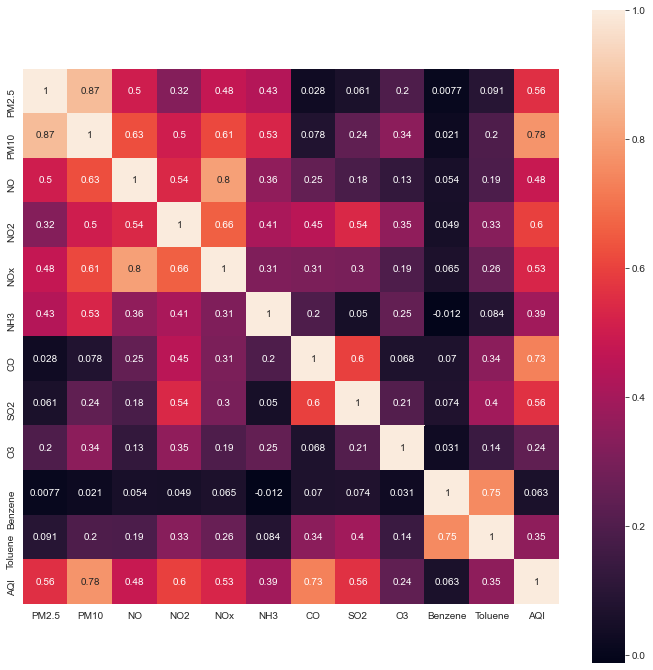

In [25]:
plt.figure(figsize = (12,12))
sns.set_style(style = 'darkgrid')
sns.heatmap(correlation, annot = True, square = True)

Train test split

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, stratify = Y, random_state = 0)

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
support = SVC()
forest= RandomForestClassifier()

SUPPORT VECTOR MACHINE and RANDOM FOREST CLASSIFIER training

In [29]:
models = [support, forest]
for i in models:
    i.fit(x_train, y_train) 

model prediction on training data

In [30]:
for i in models:
    train_prediction = i.predict(x_train)
    print(f'ACCURACY OF {i} MODEL :', accuracy_score(y_train, train_prediction))

ACCURACY OF SVC() MODEL : 0.9540064102564103
ACCURACY OF RandomForestClassifier() MODEL : 1.0


model prediction on testing data

In [31]:
for i in models:
    test_prediction = i.predict(x_test)
    print(f'ACCURACY OF {i} MODEL :', accuracy_score(y_test, test_prediction))

ACCURACY OF SVC() MODEL : 0.948076923076923
ACCURACY OF RandomForestClassifier() MODEL : 0.9987179487179487


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)
print(cm)

[[260   0   0   0   0   0]
 [  0 260   0   0   0   0]
 [  0   0 260   0   0   0]
 [  0   1   0 259   0   0]
 [  0   0   0   0 260   0]
 [  0   0   1   0   0 259]]


# predictive system

In [33]:
op_list = ['Good', 'Moderate', 'Poor', 'Satisfactory','Severe' ,'Very Poor']
input_data = input()
input_list = [float(i) for i in input_data.split(',')]
array_data = np.array(input_list)
reshaped_array = array_data.reshape(1, -1)

for i in models:
    prediction = i.predict(reshaped_array)
    print(prediction)
    print(f'FOR {i}')
    print(op_list[int(prediction)])

45.67,82.71,6.1,38.21,29.19,29.29,0.94,5.84,44.28,0.36,2.87,110.0
[1]
FOR SVC()
Moderate
[1]
FOR RandomForestClassifier()
Moderate


In [34]:
joblib.dump(support, 'support_vector.sav')
joblib.dump(forest, 'random_forest.sav')
joblib.dump(si, 'imputer.sav')
joblib.dump(le, 'encoder.sav')

['encoder.sav']